In [15]:
import numpy as np
import matplotlib.pyplot as plt



loaded_data = np.load('results/CW_data.npz')


#dp_p_list = loaded_data['dp_p_list']
delta    = loaded_data['delta']
state = loaded_data['state']
x = loaded_data['x']*1e3
time=loaded_data['time']
#slip_factor=loaded_data['slip_factor']
s_per_turn=loaded_data['s_per_turn']


excited=state==2
delta_std = np.std(delta, axis=1)


exc0=excited[1,:]

fraction_excited=sum(exc0)/len(exc0)*100

fraction_excited=[]
for i in range(len(excited)):
    fraction_excited.append(100*sum(excited[i])/len(excited[i]))


In [16]:
x.dtype

dtype('float64')

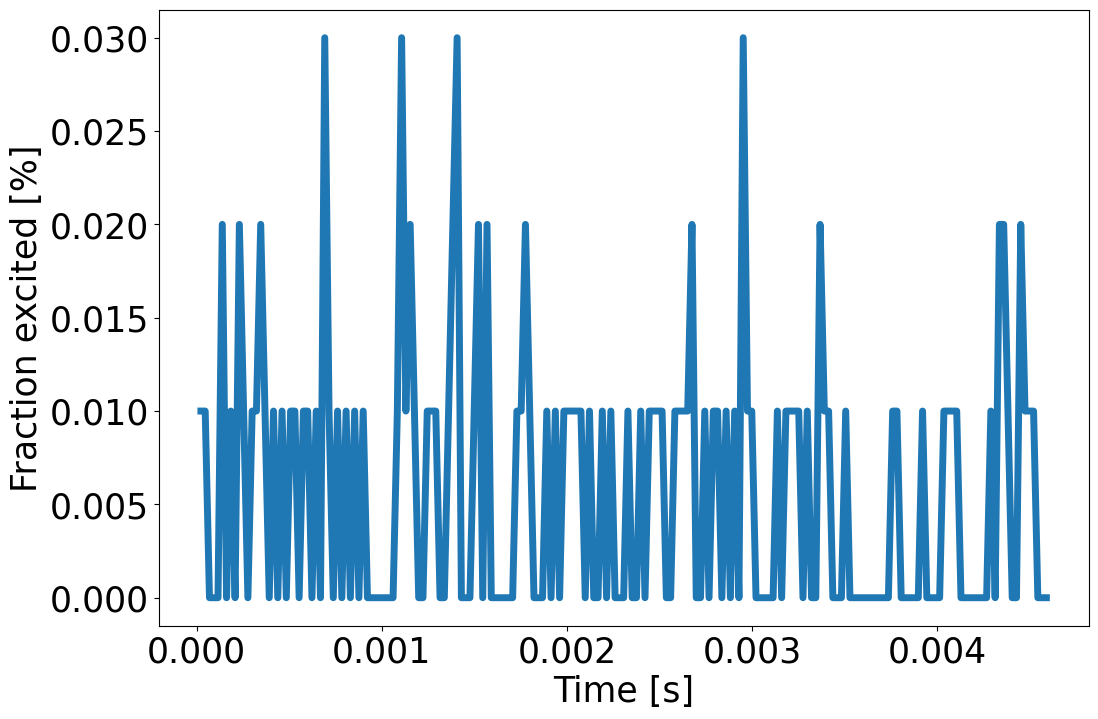

In [17]:
cmap = plt.get_cmap("tab10")
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.plot(time[1:],fraction_excited[1:], label=f'xsuite',color=cmap(0), linewidth=5.0)
plt.xlabel(r'Time [s]')
plt.ylabel(r'Fraction excited [%]')
#plt.legend()
plt.show()

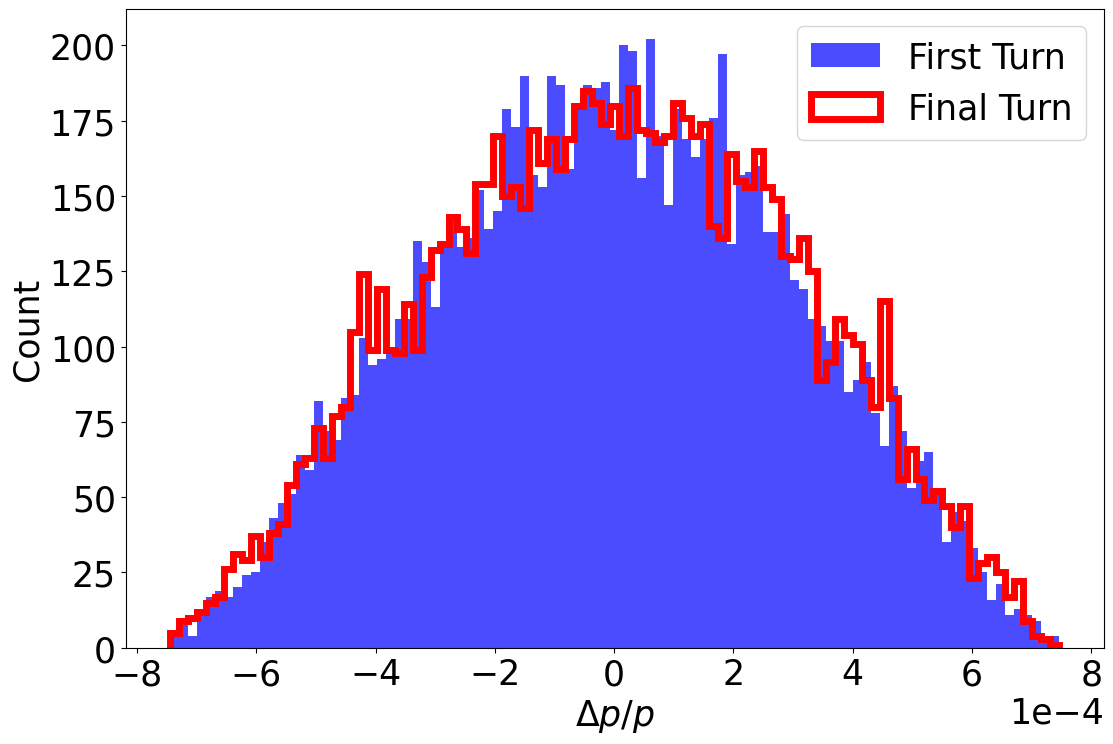

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Extract delta at the first turn (assuming the first turn is at index 0)
delta_first_turn = delta[0, :]

# Extract delta at the final turn
delta_final_turn = delta[-1, :]
min_delta=min(delta_final_turn)
max_delta=max(delta_final_turn)

bins=np.linspace(min_delta, max_delta,100)

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
# plt.hist(delta_first_turn, bins=bins, color='blue', alpha=0.7, label='First Turn')
# plt.hist(delta_final_turn, bins=bins, color='darkorange', alpha=0.0, label='Final Turn')
plt.hist(delta_first_turn, bins=bins, color='blue', alpha=0.7, label='First Turn',  linewidth=5)
plt.hist(delta_final_turn, bins=bins, color='red', alpha=1, label='Final Turn', histtype='step', linewidth=5)
plt.xlabel(r'$\Delta p/p$')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#plt.savefig('Histogram_comparison.eps', format='eps', dpi=300)
plt.show()


0.00029738998393121657


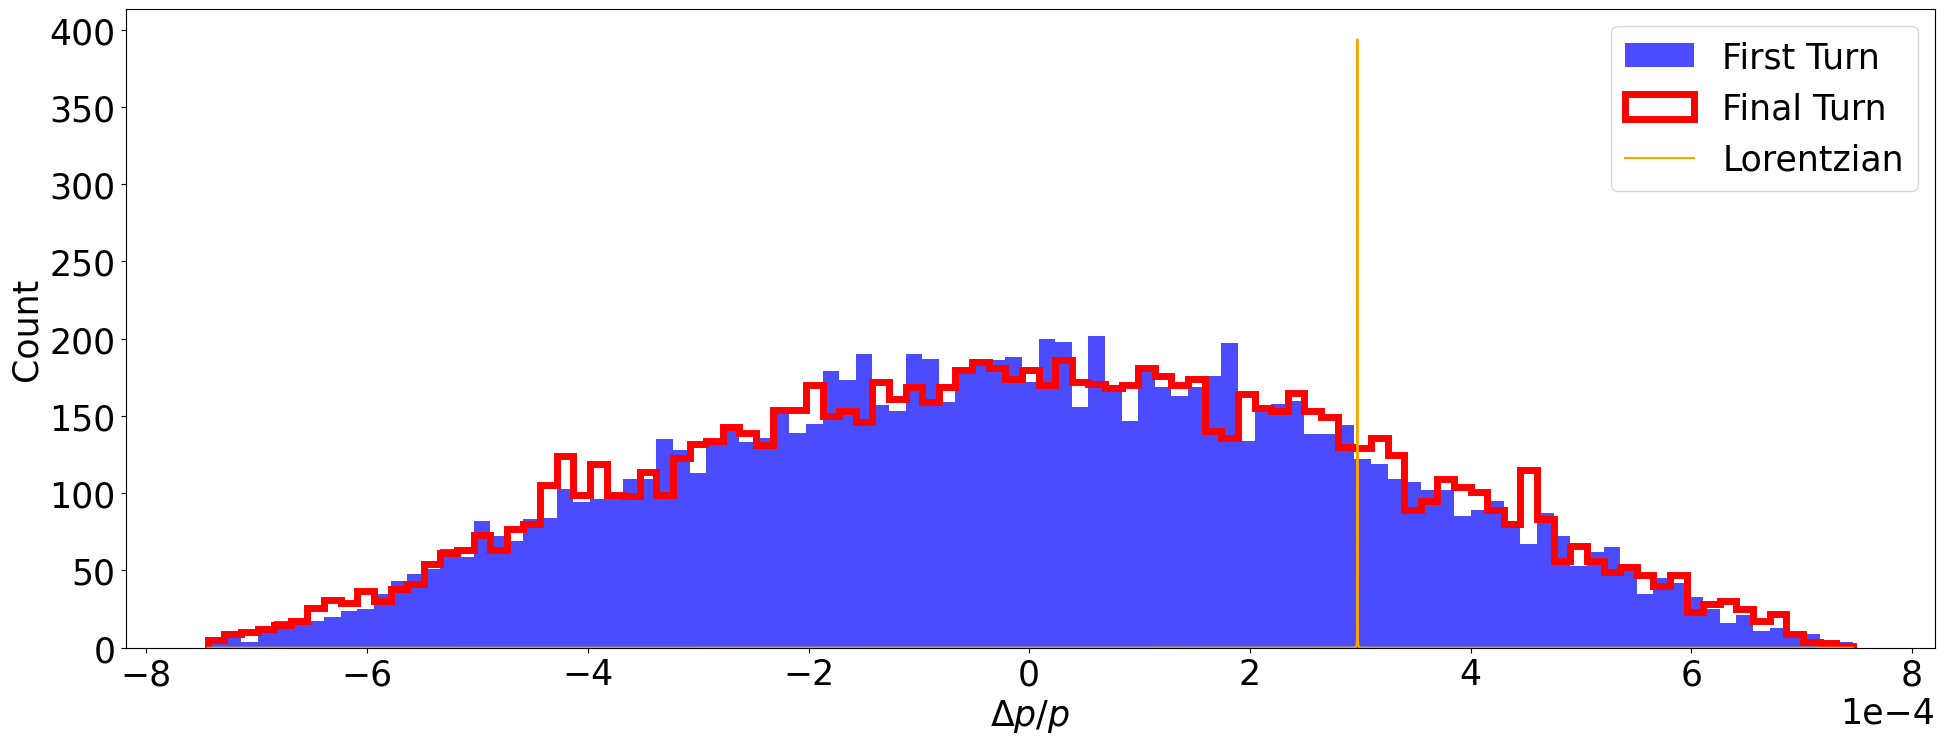

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy import constants 

import numpy as np
import matplotlib.pyplot as plt
from scipy import constants 

C_LIGHT = 2.99792458e8
hbar = 1.054571817e-34#; // J*sec
QELEM = 1.60217663e-19

# Ion properties:
m_u = 931.49410242e6 # eV/c^2 -- atomic mass unit
A = 207.98 # Lead-208
Z = 82  # Number of protons in the ion (C)
Ne = 3 # Number of remaining electrons (Lithium-like)
m_e = 0.511e6 # eV/c^2 -- electron mass
m_p = 938.272088e6 # eV/c^2 -- proton mass
c = 299792458.0 # m/s

q0=Z-Ne

mass0 = A*m_u + Ne*m_e # eV/c^2
equiv_proton_momentum = 236e9 # eV/c = gamma_p*m_p*v
gamma_p = np.sqrt( 1 + (equiv_proton_momentum/m_p)**2 ) # equvalent gamma for protons in the ring

p0c = equiv_proton_momentum*(Z-Ne) # eV/c
gamma0 = np.sqrt( 1 + (p0c/mass0)**2 ) # ion relativistic factor
beta0 = np.sqrt(1-1/(gamma0*gamma0)) # ion beta

####################################################################################################################

hc=constants.hbar*C_LIGHT/constants.e # eV*m (ħc)
#lambda_0 = 1034.1703447721 *1e-9 # m -- ion excitation wavelength
# hw0 = 2*np.pi*hc/lambda_0 # m -- ion excitation wavelength
cos_theta=1
theta_l=0
hw0=230.823 # eV


laser_wavelength=1034.1703447721 *1e-9
ion_excitation_energy=hw0
ion_excited_lifetime=76.6e-12
gamma_decay=1/ion_excited_lifetime

####################################################################################################################


delta_range=np.linspace(min_delta,max_delta,int(1e6))

K1 = 7


pc = p0c*(1.0+delta_range)#; // eV
gamma = np.sqrt(1.0 + pc*pc/(mass0*mass0))
beta_rel  = np.sqrt(1.0 - 1.0/(gamma*gamma))

laser_omega_ion_frame = (2.0*np.pi*C_LIGHT/laser_wavelength)*(1.0+beta_rel*cos_theta)*gamma

OmegaTransition = ion_excitation_energy*QELEM/hbar#; // rad/sec
DeltaDetuning = (OmegaTransition - laser_omega_ion_frame)#/(2*gamma)


ratio_ΔΓ_range = DeltaDetuning/gamma_decay


# Calculate the heatmap values using the equation
excitation_prob = 0.5*K1 / ((4*ratio_ΔΓ_range*ratio_ΔΓ_range + K1 + 1))

max_prob = np.max(excitation_prob)
max_prob_index = np.argmax(excitation_prob)

# Find the corresponding delta value
corresponding_max_delta = delta_range[max_prob_index]

print(corresponding_max_delta)

# Create the heatmap
plt.figure(figsize=(20, 8))
plt.rcParams.update({'font.size': 25})
plt.hist(delta_first_turn, bins=bins, color='blue', alpha=0.7, label='First Turn', linewidth=5)
plt.hist(delta_final_turn, bins=bins, color='red', alpha=1, label='Final Turn', histtype='step', linewidth=5)
plt.plot(delta_range,excitation_prob*9e2,color='orange',label='Lorentzian')
plt.xlabel(r'$\Delta p/p$')
plt.ylabel('Count')
plt.legend()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
plt.tight_layout()
plt.show()


Make Schottky plots

In [20]:
# Note, within n*emittance, one have n_% of particles where
#  n=1; n_% = 39%
#  n=2; n_% = 63%
#  n=4; n_% = 87%
#  n=6; n_% = 95%
n_part = int(1e4)
# sigma_dp = 1e-4 # relative ion momentum spread
# Let's consider 95% of particles, i.e. n=6 for transverse action, and n=2 for abs dp/p
n_bins = 100

# bins_x  = gemitt_x*np.linspace(0,7,n_bins+1)
# bins_y  = gemitt_y*np.linspace(0,7,n_bins+1)
bins_dp = np.linspace(min_delta,max_delta,n_bins+1)
# bins_dp = sigma_dp*np.linspace(-9.2*1e-5,,n_bins+1)
# hist_x  = bins_x[0:] + ( bins_x[1] -  bins_x[0])/2
# hist_y  = bins_y[0:] + ( bins_y[1] -  bins_y[0])/2
hist_dp = bins_dp[0:]+ (bins_dp[1] - bins_dp[0])/2
all_hist_x  = np.zeros((len(time), n_bins))
all_hist_y  = np.zeros((len(time), n_bins))
all_hist_dp = np.zeros((len(time), n_bins))
all_found_x = np.zeros((len(time)))
all_found_y = np.zeros((len(time)))
all_found_dp = np.zeros((len(time)))

for i_turn in np.arange(len(time)): 
    #all_hist_x[i_turn,:], _  = np.histogram(action_x[i_turn,:],      bins=bins_x,  density=False, weights=None)
    #all_hist_y[i_turn,:], _  = np.histogram(action_y[i_turn,:],      bins=bins_y,  density=False, weights=None)
    all_hist_dp[i_turn,:], _ = np.histogram((delta[i_turn,:]), bins=bins_dp, density=False, weights=None)

    # _aux = np.where(np.cumsum(all_hist_x[i_turn,:]/n_part) > 0.95)[0]
    # if len(_aux) > 0:
    #     all_found_x[i_turn] = hist_x[_aux[0]]
    # else:
    #     all_found_x[i_turn] = hist_x[-1]
    
    # _aux = np.where(np.cumsum(all_hist_y[i_turn,:]/n_part) > 0.95)[0]
    # if len(_aux) > 0:
    #     all_found_y[i_turn] = hist_y[_aux[0]]
    # else:
    #     all_found_y[i_turn] = hist_y[-1]

    _aux = np.where(np.cumsum(all_hist_dp[i_turn,:]/n_part) > 0.95)[0]
    if len(_aux) > 0:
        all_found_dp[i_turn] = hist_dp[_aux[0]]
    else:
        all_found_dp[i_turn] = hist_dp[-1]



def imagesc(im, x = None, y = None, **kwargs):
    """
    Wrapper for PyPlot's `imshow` to imitate Matlab-style IMAGESC.

    `imagesc(z; x, y)` treats `z` as a 2D array to visualize, with `x` giving pixel coordinates
    across a row and `y` giving pixel columns *down* a column.

    Omitting `x` and/or `y` implies `1:size(z, 2)` and `1:size(z, 1)` respectively.

    PyPlot will show the image using a carefully-constructed call to `PyPlot.imshow` where:
    - the extent is carefully initialized so the plot's ticks line up exactly with `x` and `y`
    - the origin is at the lower-left of the window
    - the aspect ratio is fluid (uses the full window)
    - no interpolation is applied.
    """
    if x is None:
        x = np.arange(np.shape(im)[1])
    if y is None:
        y = np.arange(np.shape(im)[0])

    def _extents(f):
        delta = f[2] - f[1]
        return [f[1] - delta / 2, f[-1] + delta / 2]
    plt.imshow(im, extent=(_extents(x)[0], _extents(x)[-1], _extents(y)[0],  _extents(y)[-1]), cmap = 'RdBu_r',aspect="auto", origin="lower", interpolation="none", **kwargs)
 

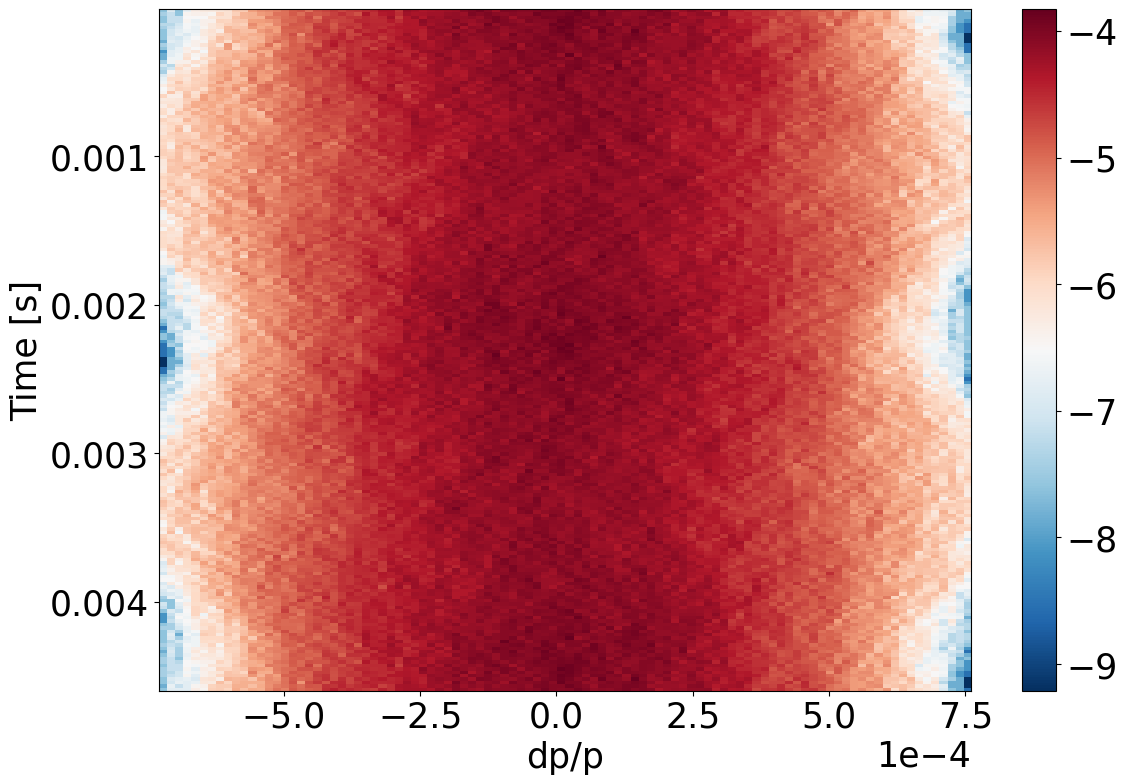

In [21]:

# Create the figure and primary y-axis
fig, ax1 = plt.subplots(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})

# Plot the data on the primary y-axis
imagesc(np.log((all_hist_dp+1)/n_part), hist_dp, time)
plt.colorbar()
plt.tight_layout()

# Customize the primary y-axis and labels
ax1.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
ax1.set_xlabel('dp/p')
ax1.set_ylabel('Time [s]')

# Invert the y-axis
ax1.invert_yaxis()

plt.show()